## Support Vector Classifier

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
## lets Create synthetic data points
from sklearn.datasets import make_classification

In [4]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [6]:
pd.DataFrame(X)[0]

0     -1.781692
1      0.870569
2     -0.580838
3      0.155785
4      0.376713
         ...   
995   -0.701003
996   -0.546591
997   -1.055117
998   -0.685534
999   -1.546629
Name: 0, Length: 1000, dtype: float64

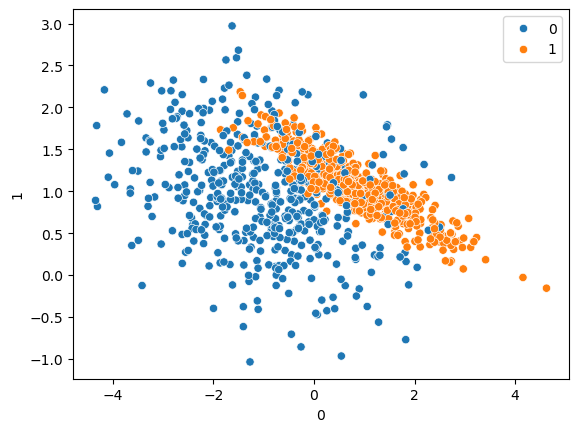

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)
plt.show()

In [11]:
from sklearn.svm import SVC

In [12]:
svc=SVC(kernel='linear')

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [14]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [15]:
## Prediction
y_pred = svc.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix


In [17]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82       124
           1       0.78      0.98      0.87       126

    accuracy                           0.85       250
   macro avg       0.87      0.85      0.85       250
weighted avg       0.87      0.85      0.85       250

[[ 89  35]
 [  3 123]]


In [25]:
rbf=SVC(kernel='rbf')

In [22]:
rbf.fit(X_train,y_train)

SVC()

In [26]:
## Prediction
y_pred1 = svc.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82       124
           1       0.78      0.98      0.87       126

    accuracy                           0.85       250
   macro avg       0.87      0.85      0.85       250
weighted avg       0.87      0.85      0.85       250

[[ 89  35]
 [  3 123]]


In [28]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [29]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [30]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [32]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       124
           1       0.82      0.97      0.89       126

    accuracy                           0.88       250
   macro avg       0.89      0.88      0.87       250
weighted avg       0.89      0.88      0.87       250

[[ 97  27]
 [  4 122]]
